In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Exploratory Data Analysis


In [109]:
df = pd.read_csv("https://raw.githubusercontent.com/askoshiyama/mli-cohort3/master/boston.csv")

In [113]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,T1
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [114]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,T1
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [115]:
df.V4.value_counts()

0    471
1     35
Name: V4, dtype: int64

- V4 is a binary variable

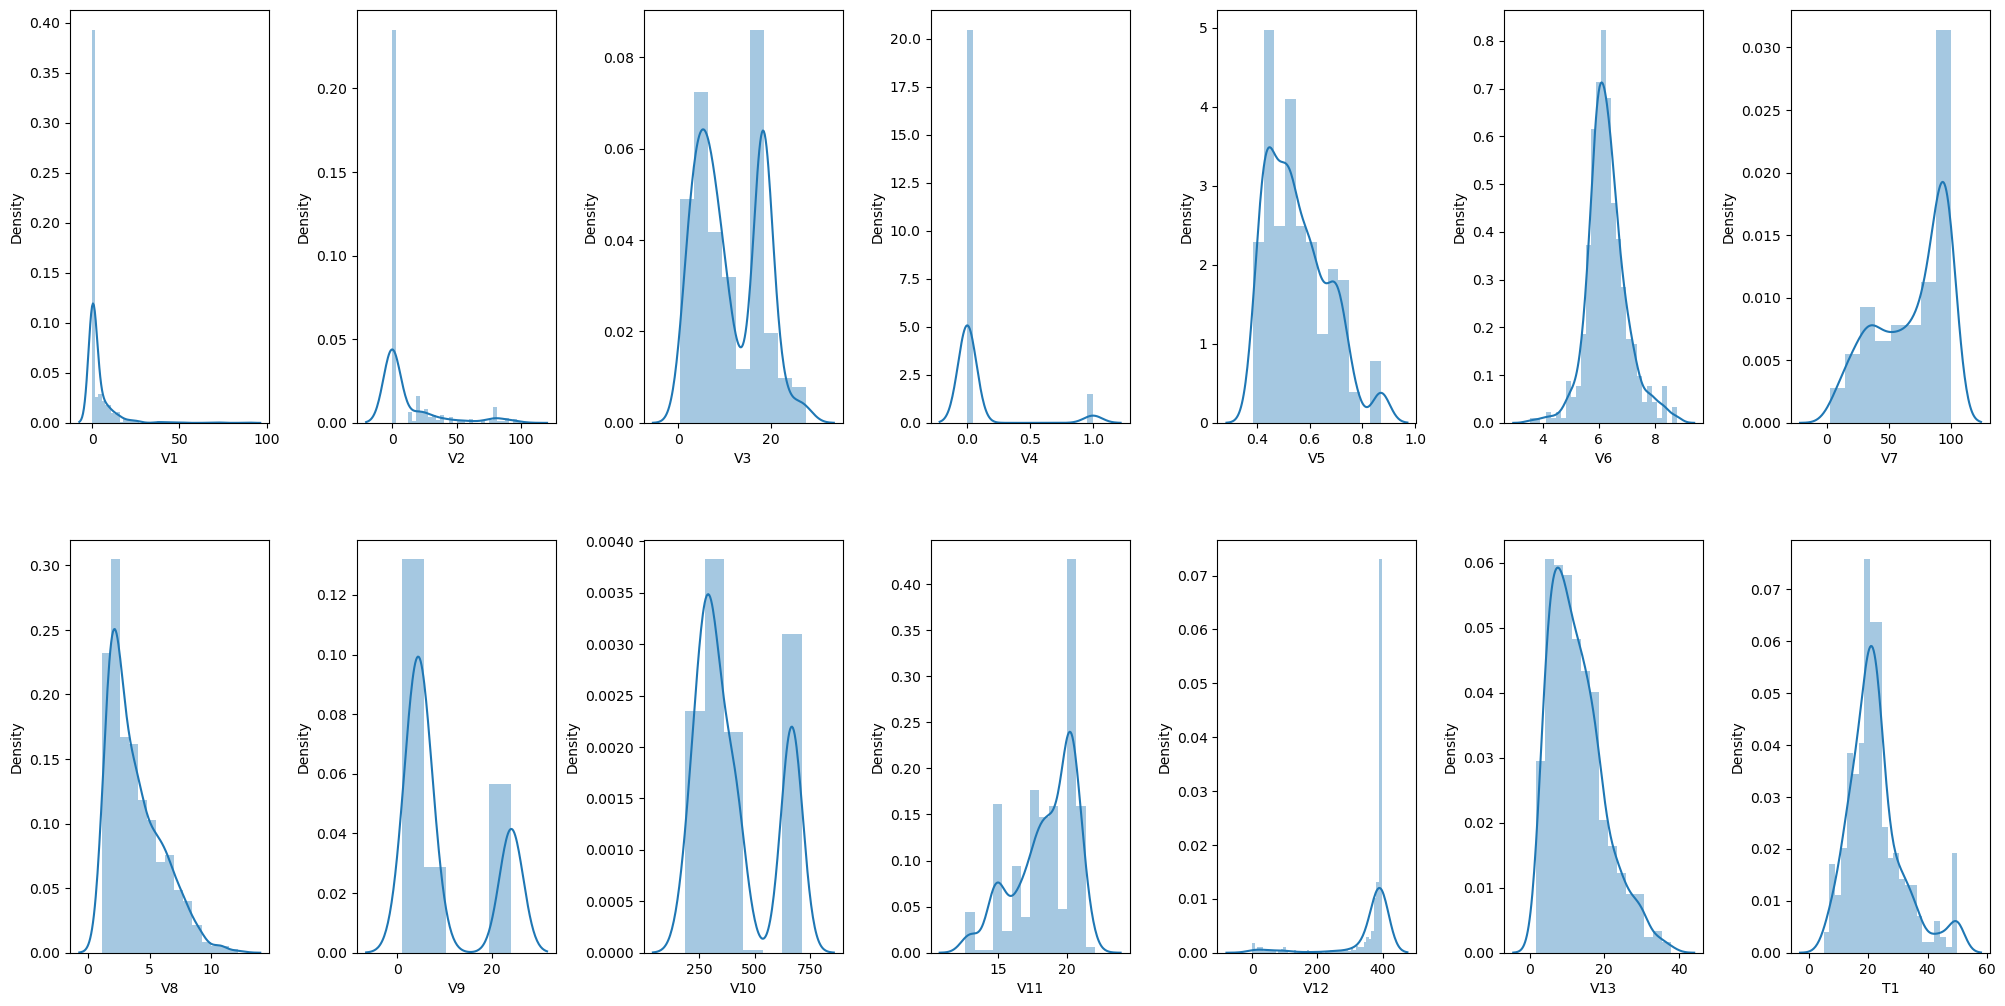

In [116]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

- Plots V1, V2, V4 and V12 look highly right skewed. 

- Exploring the V1 variable, all the values are greater than 0 and hence lets try and perform Log transformation

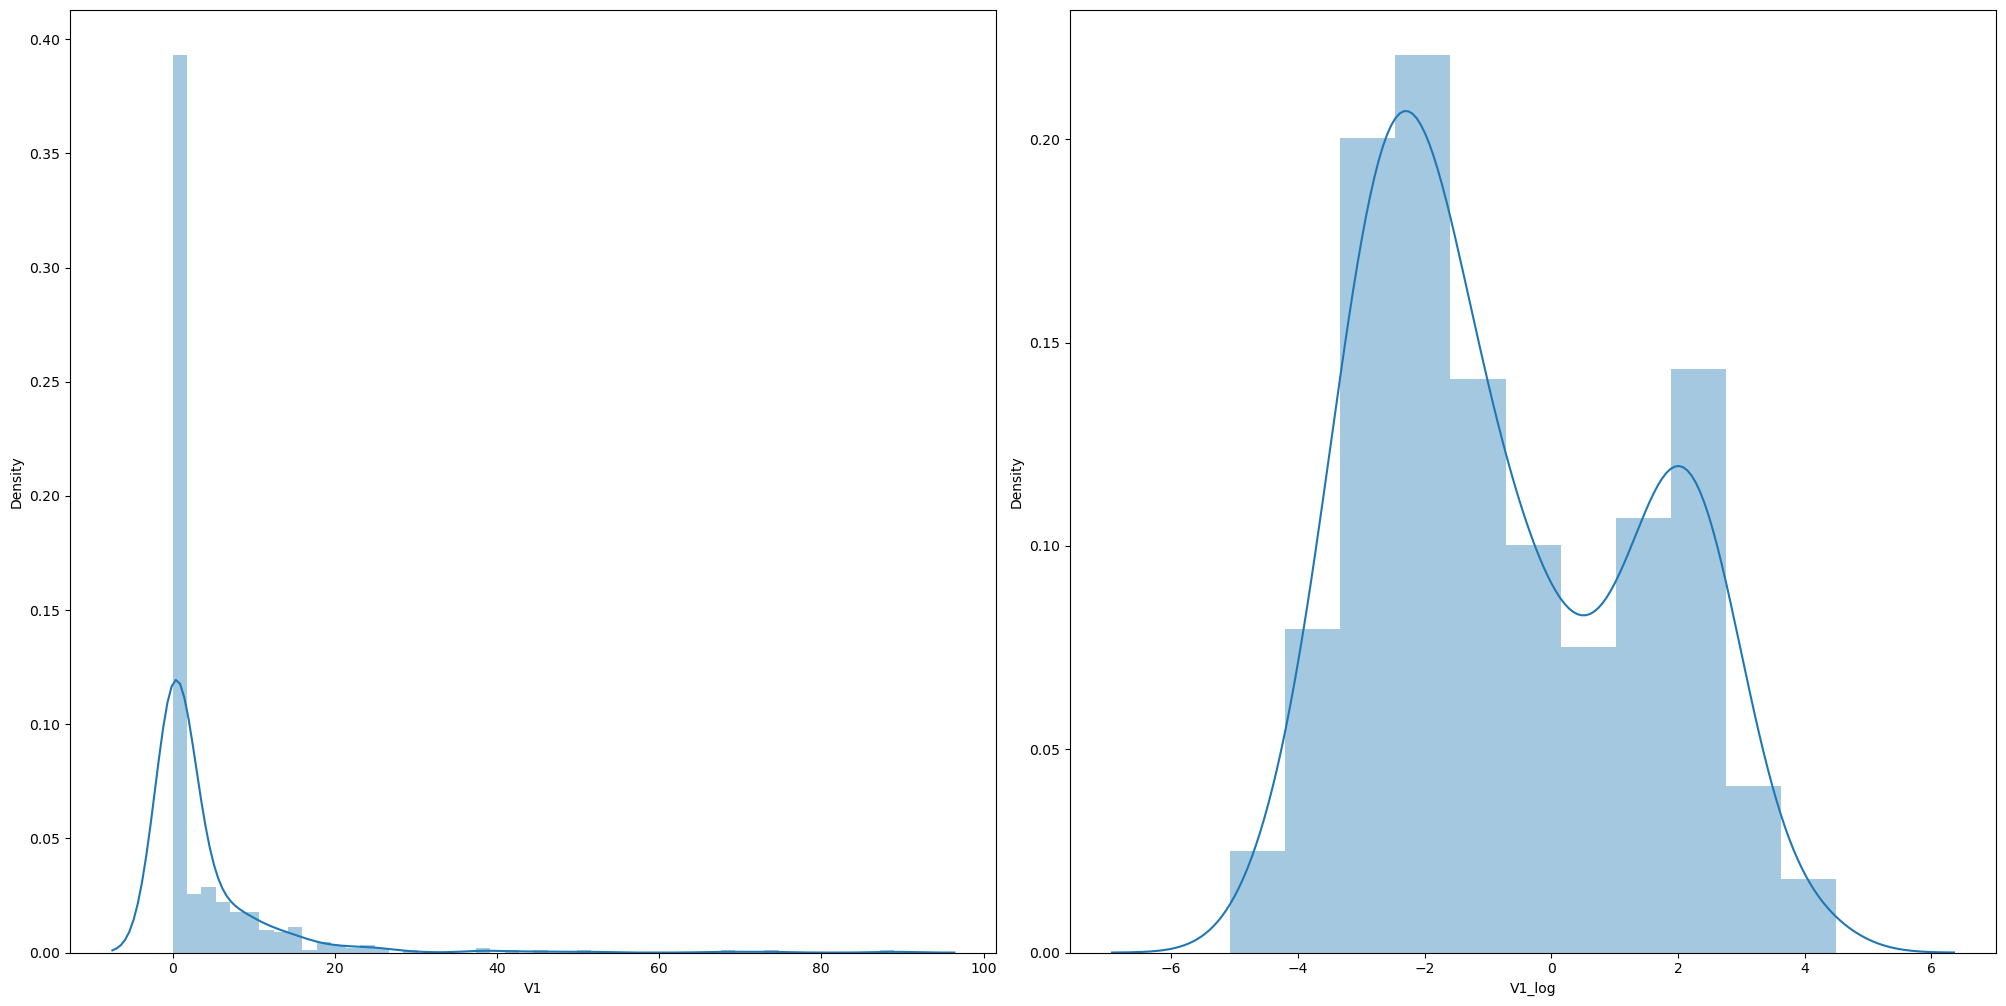

In [117]:
df['V1_log'] = np.log(df['V1'])
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col in [df['V1'], df['V1_log']]:
    sns.distplot(col, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

- The distribution of V1 now looks Bimodal(double bell curve) and easy to interpret

- Exploring V2 variable, it has many values equal to zero. So, let's perform Log(x+1) transformation

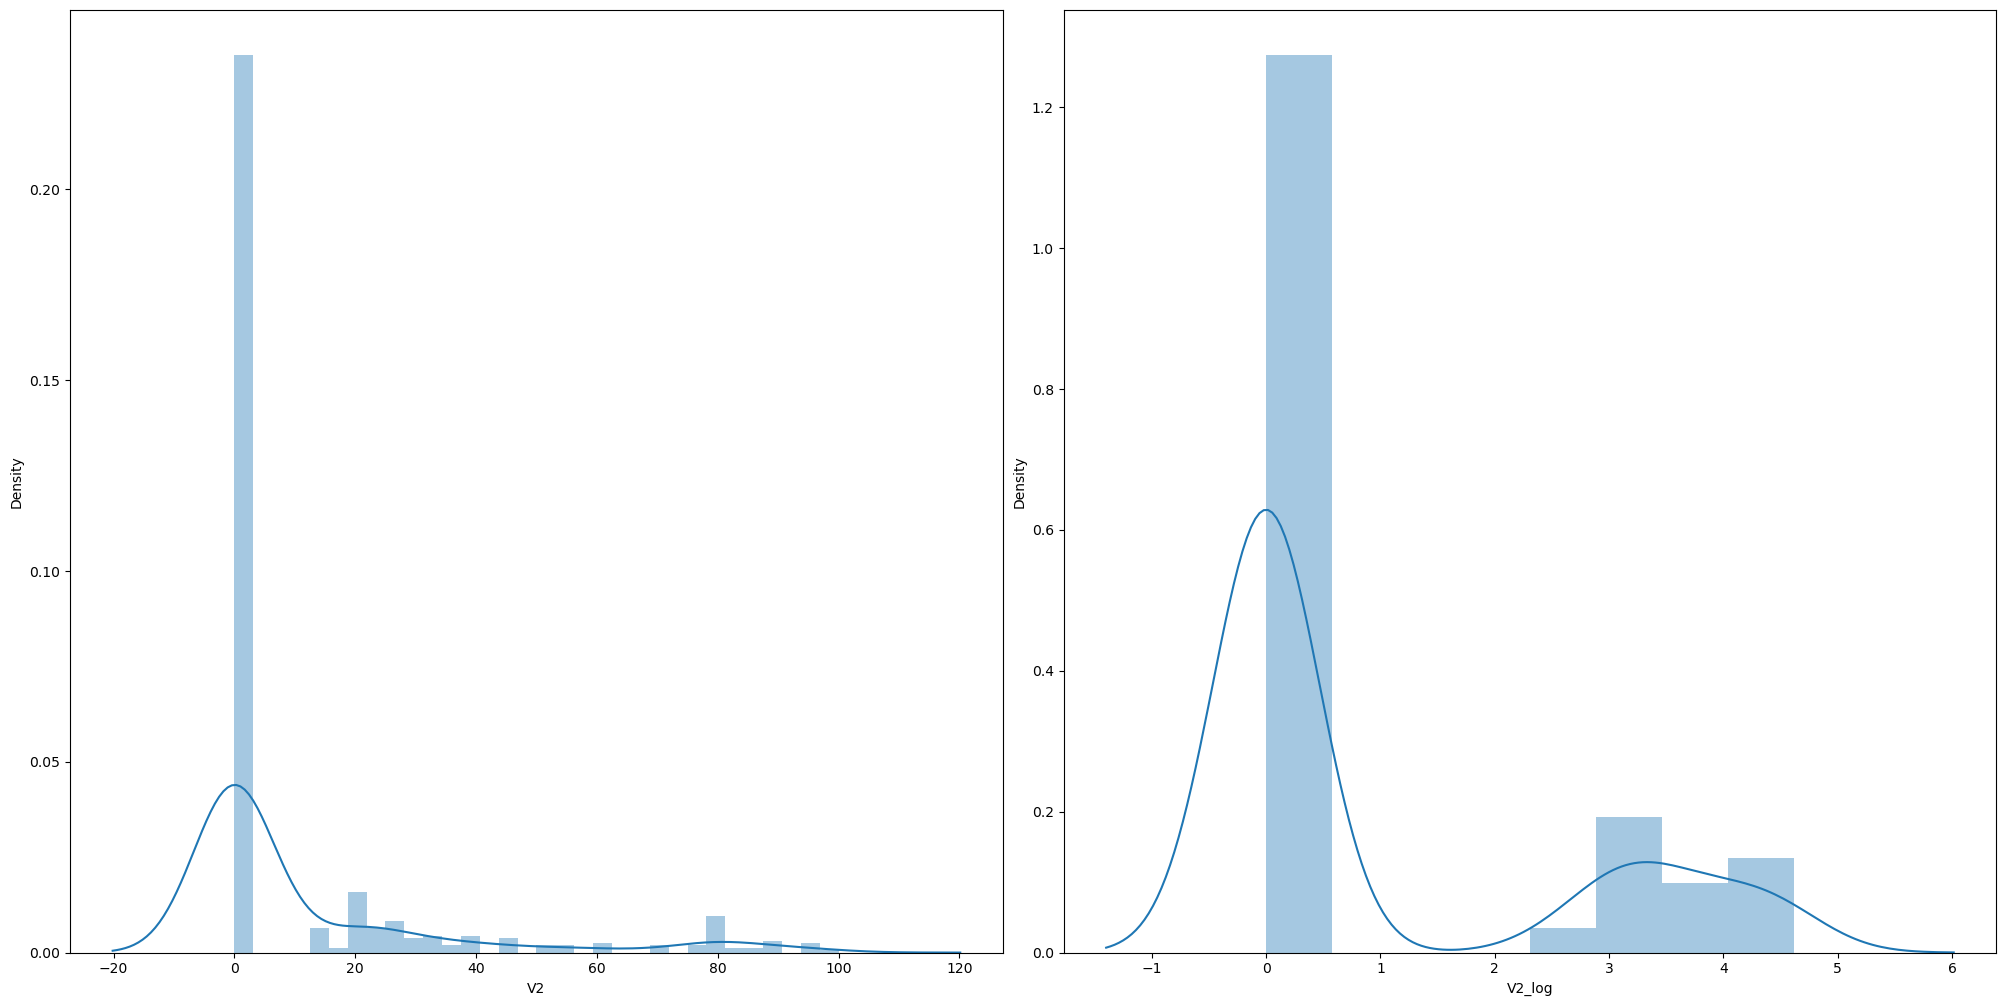

In [118]:
df['V2_log'] = np.log(df['V2']+1)
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col in [df['V2'], df['V2_log']]:
    sns.distplot(col, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

- Not much of a difference in the distribution. 
- Variable V4 is a binary variable and doesn't need to be transformed.
- Variable V12 also contains all values >0. So, lets perform log transformation

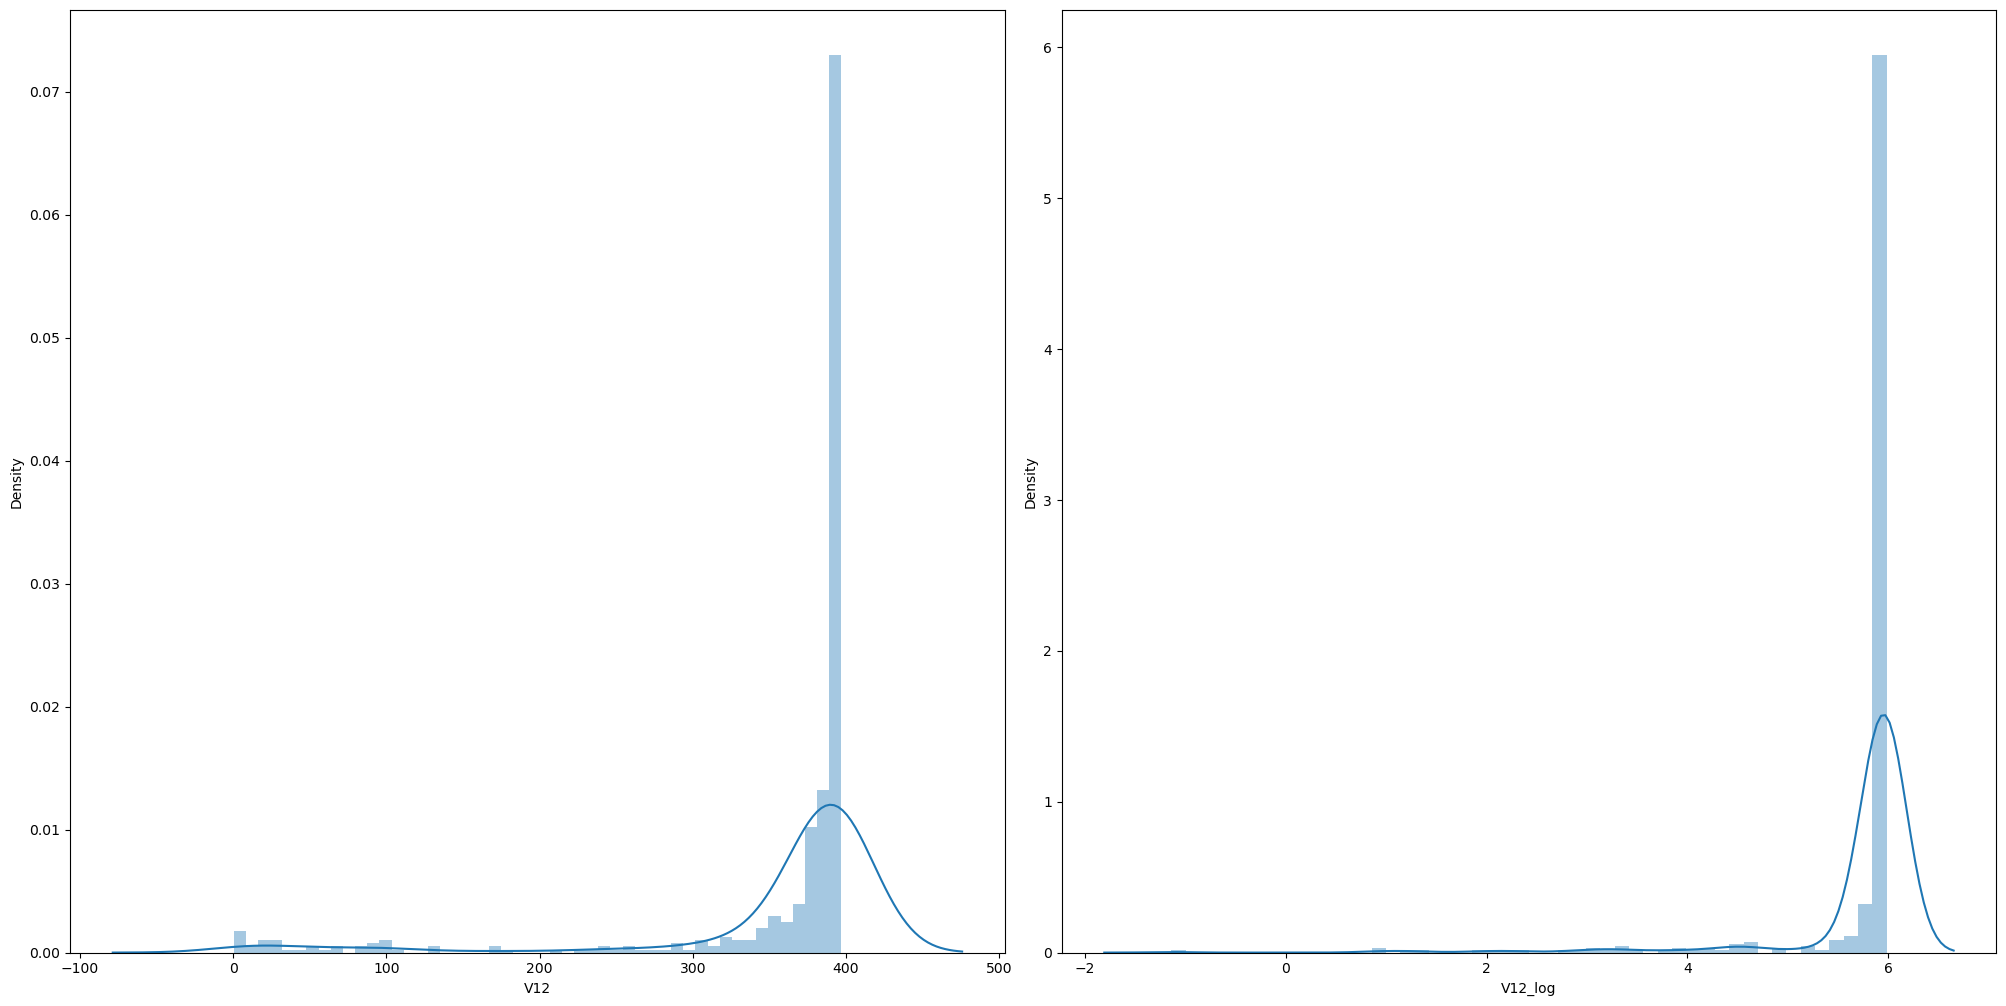

In [119]:
df['V12_log'] = np.log(df['V12'])
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col in [df['V12'], df['V12_log']]:
    sns.distplot(col, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

- Not much of a difference in the distribution even after transformation

In [120]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,T1,V1_log,V2_log,V12_log
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,-5.064036,2.944439,5.983684
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,-3.600502,0.000000,5.983684
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,-3.601235,0.000000,5.973377
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,-3.430523,0.000000,5.977949
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,-2.672924,0.000000,5.983684


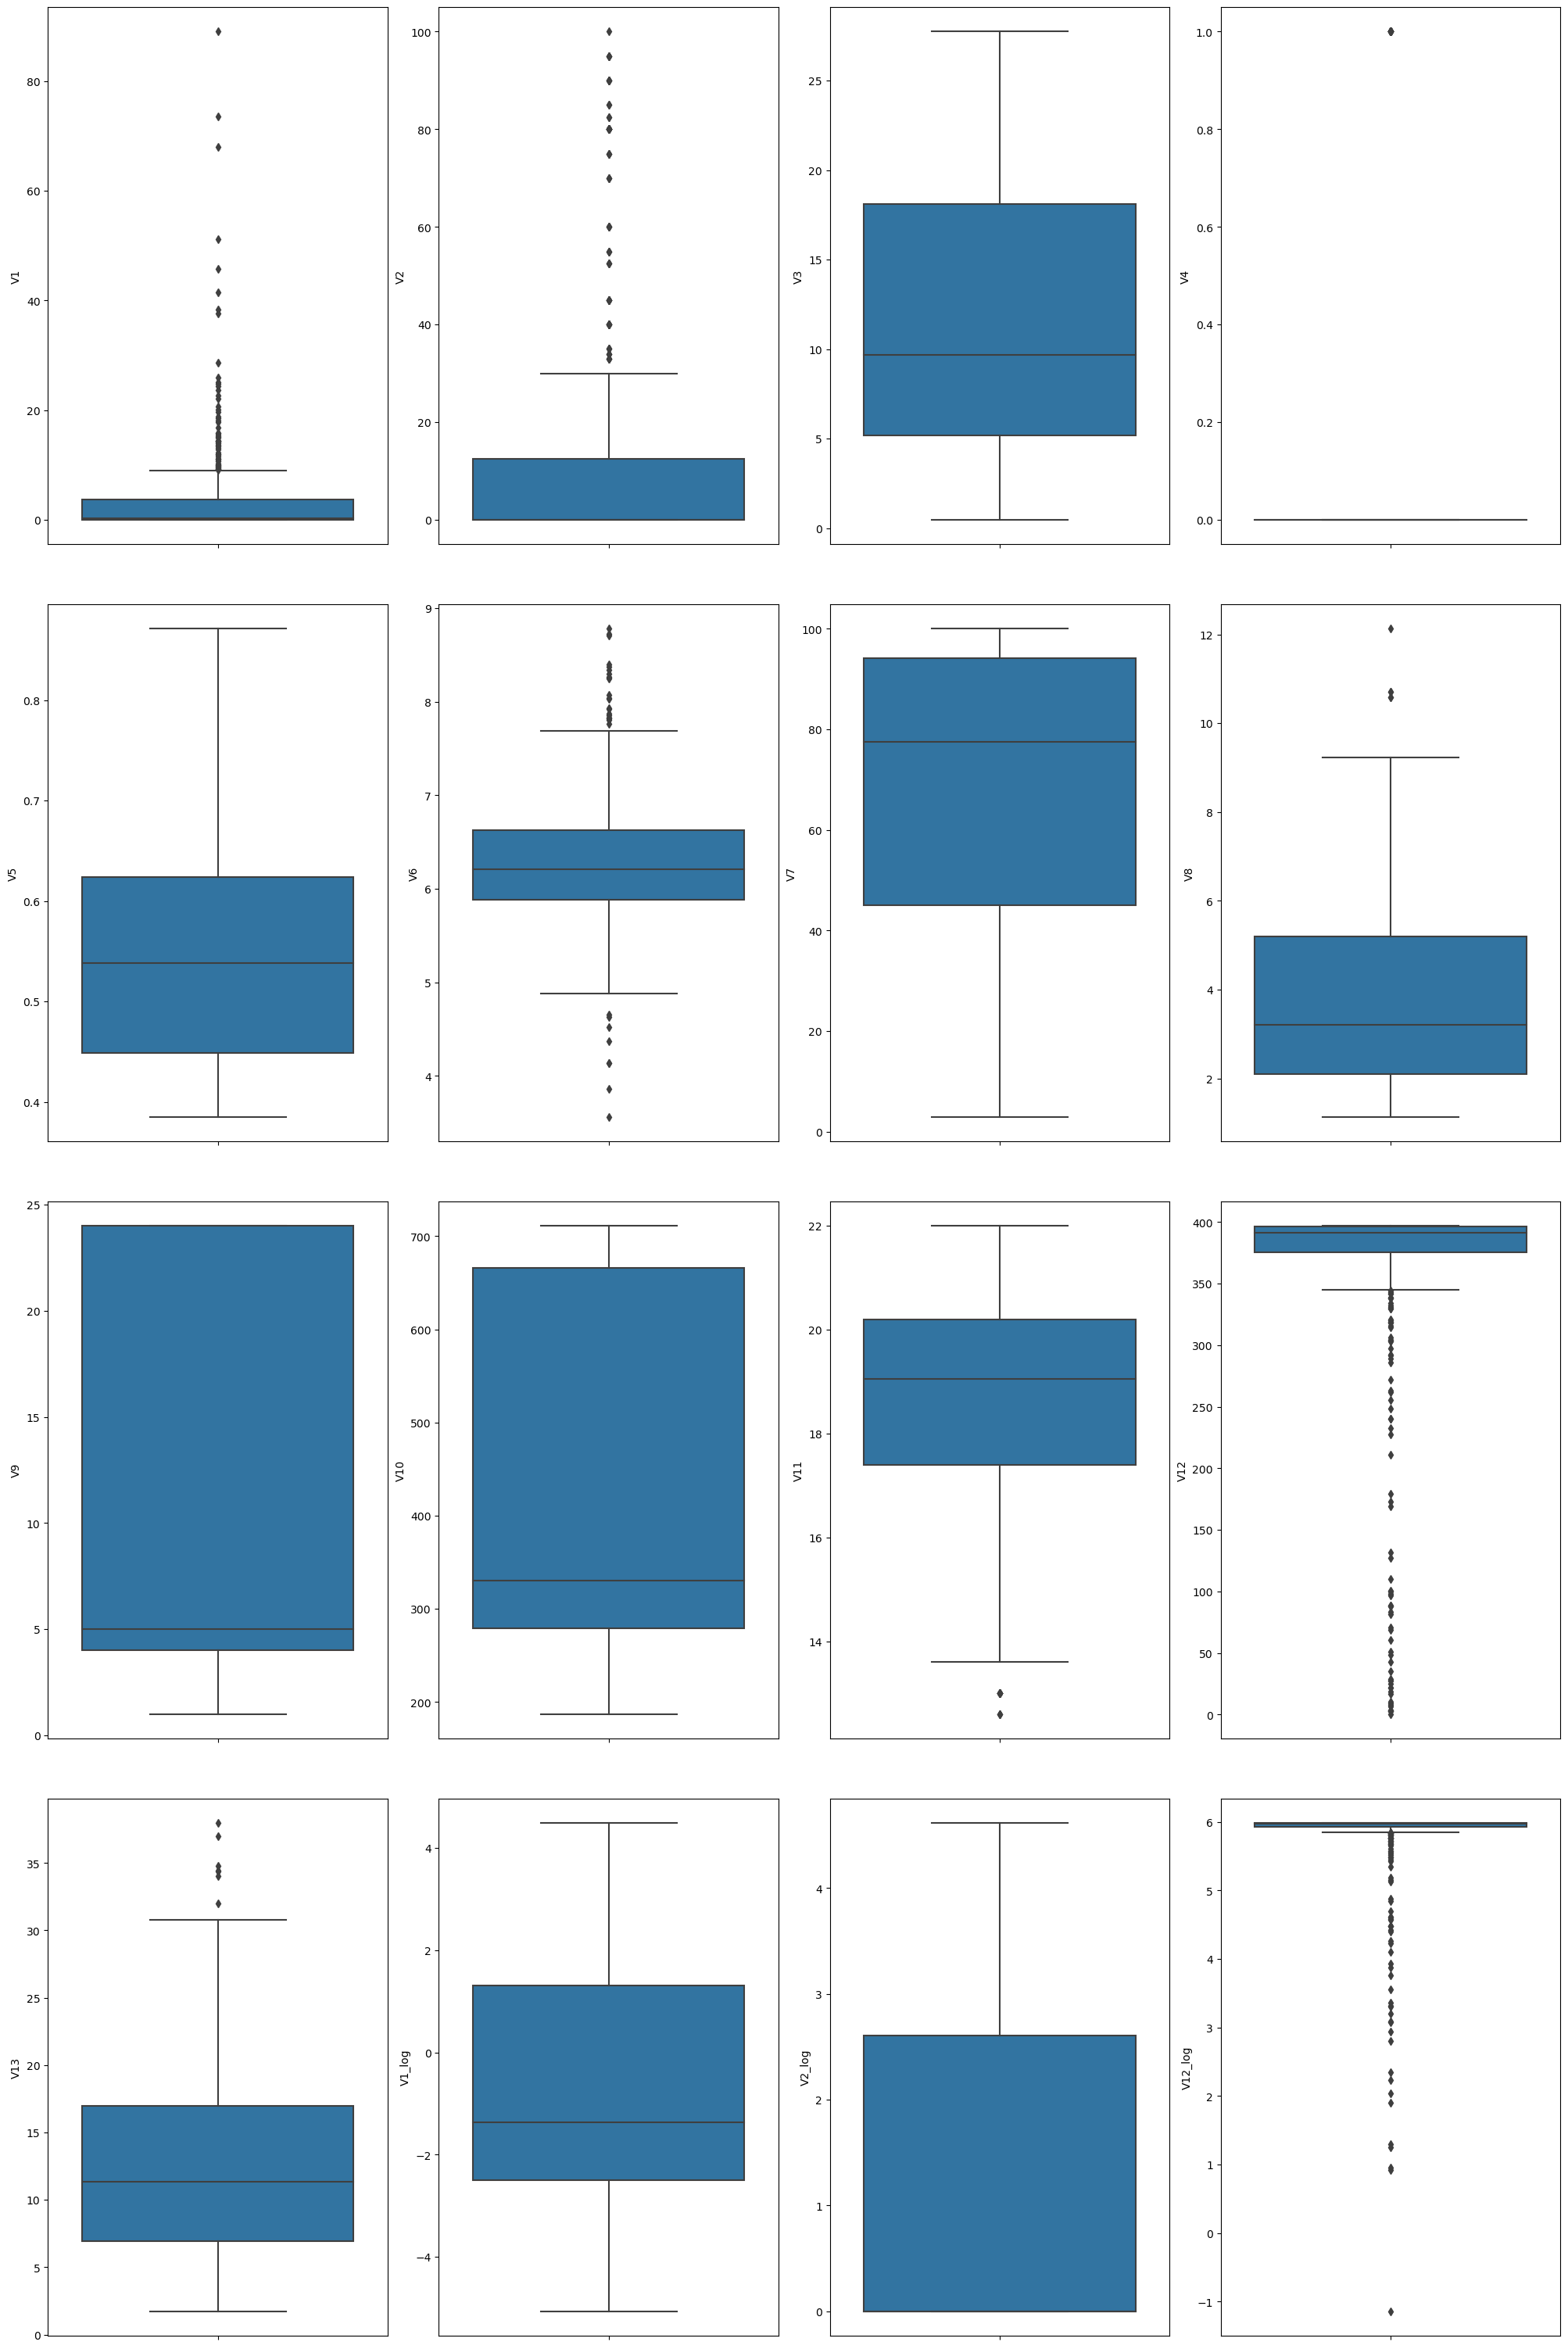

In [121]:

fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(20, 30))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'T1':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

- From the above box plots, there seem to be some outliers. have to cross verify if they are genuine outliers or they are just possible values but outside the general range(mean-1.5*IQR, mean+1.5*IQR)

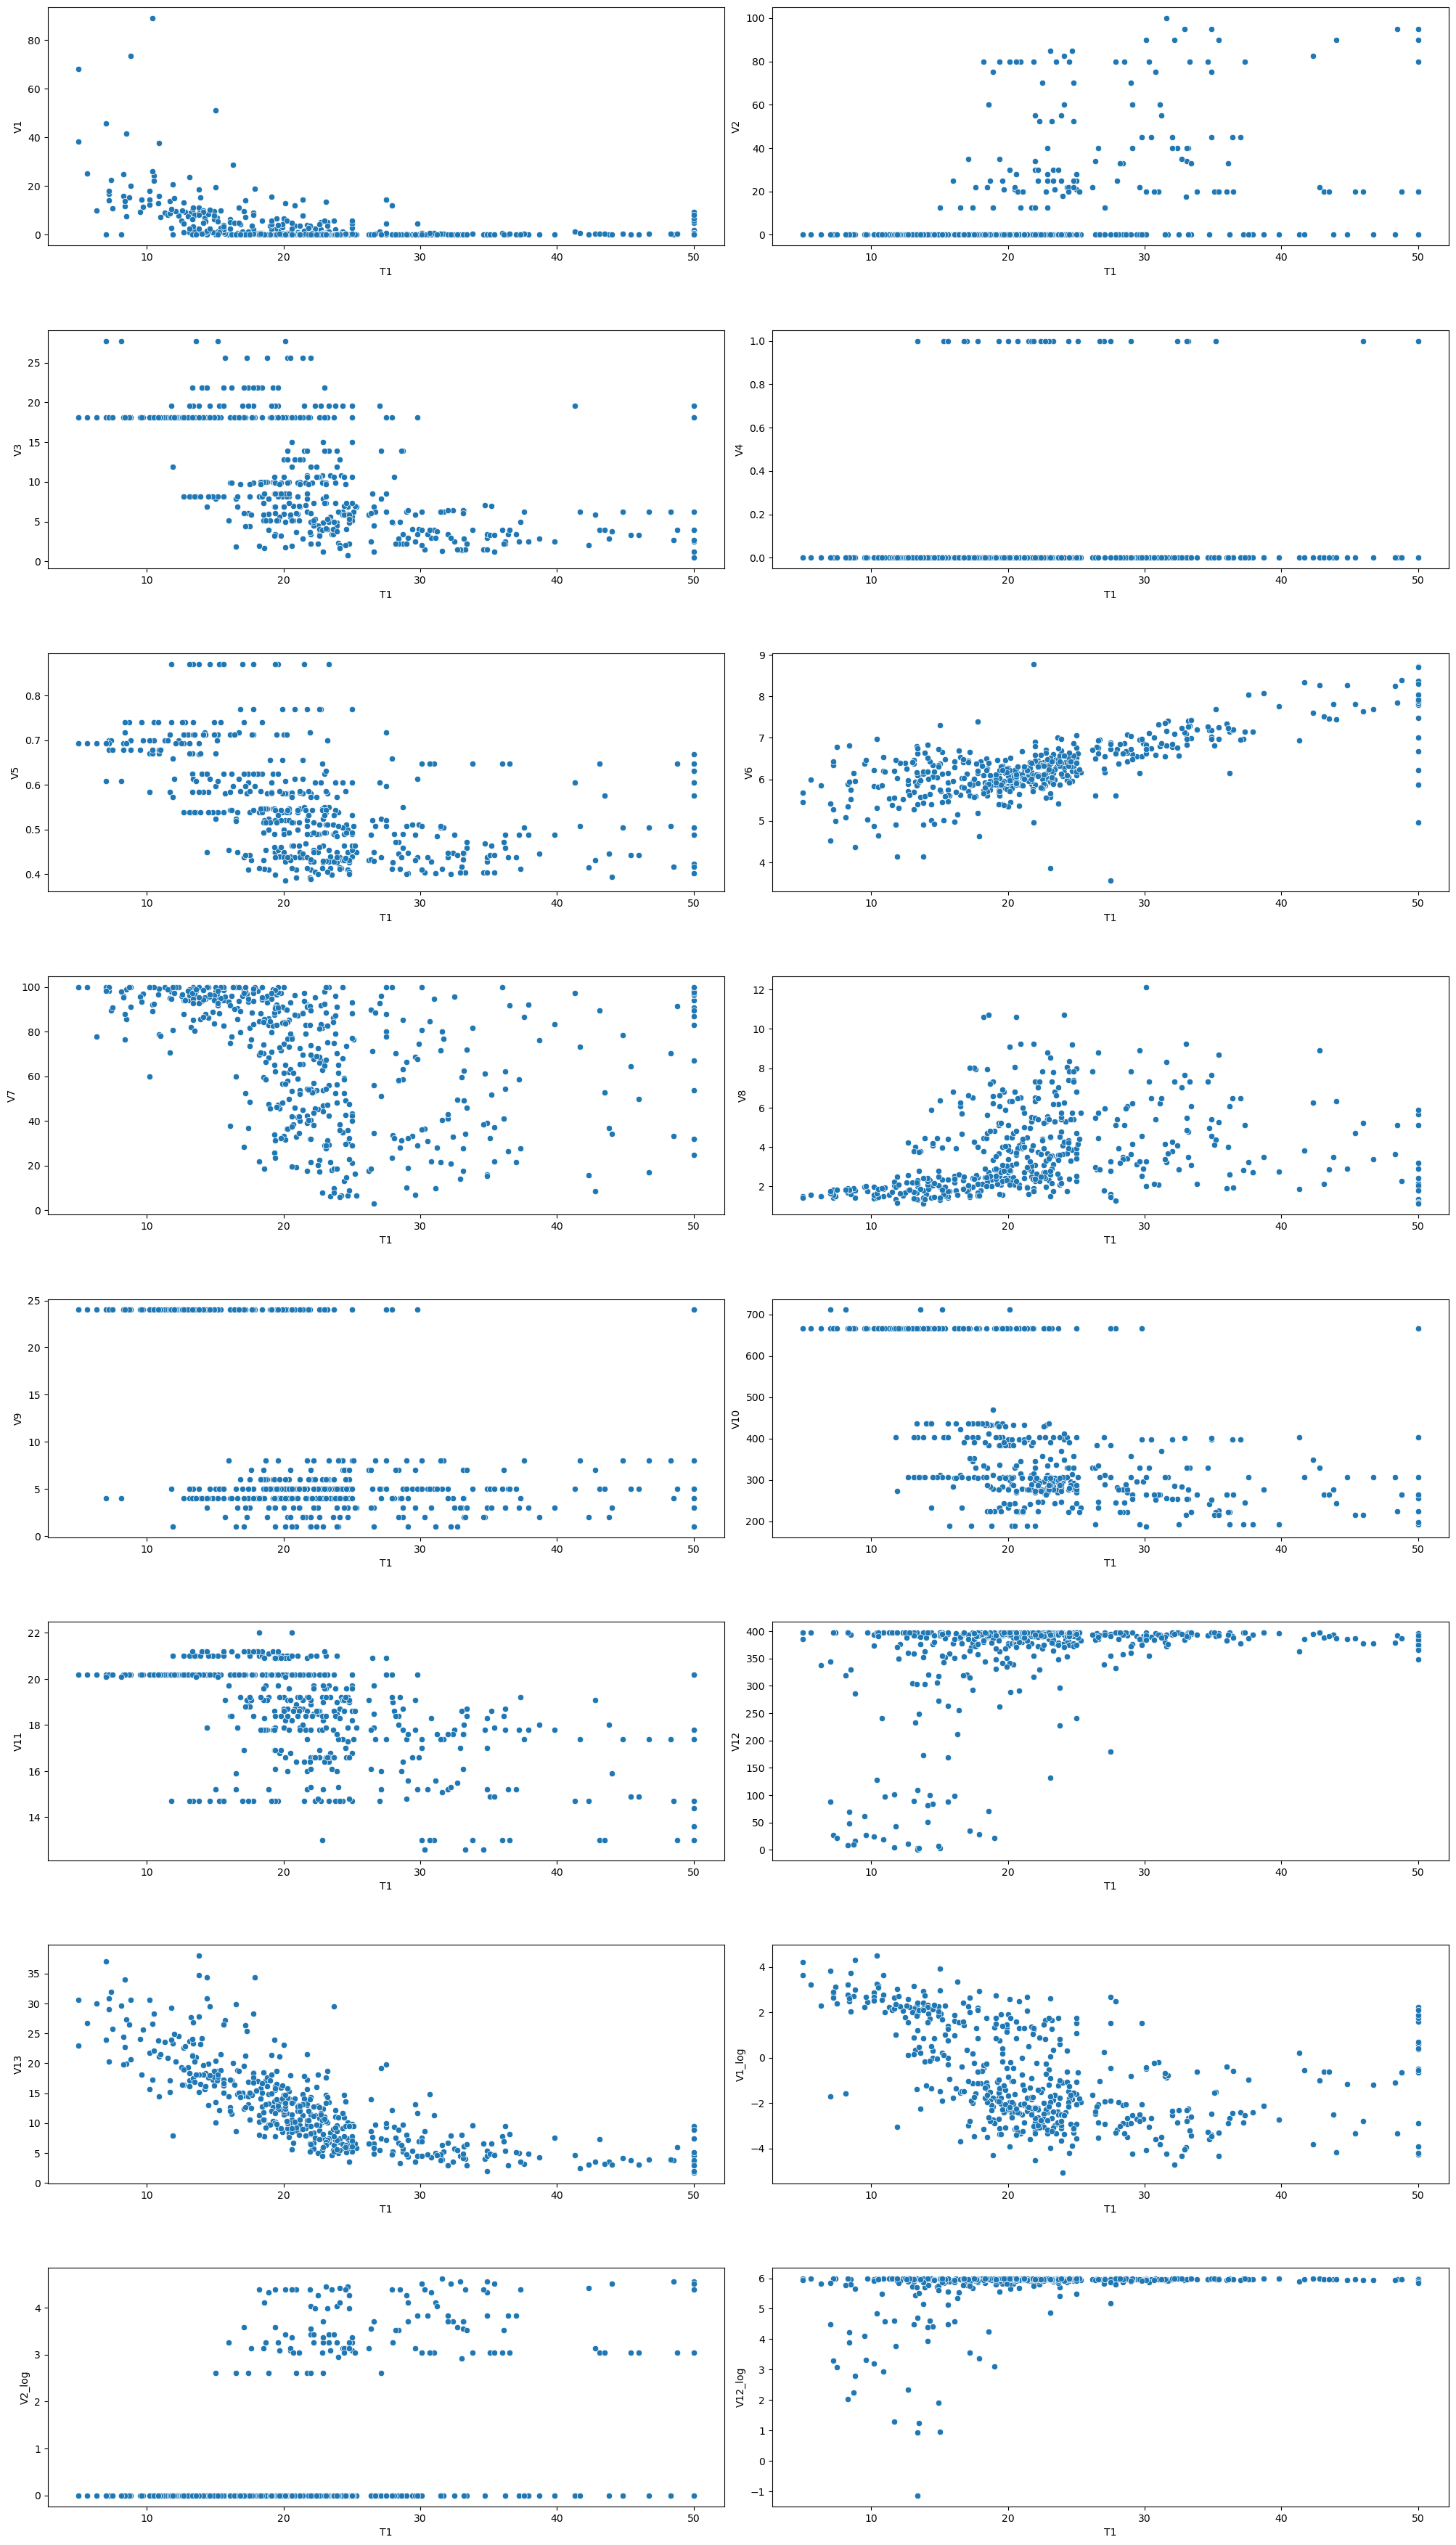

In [122]:

fig, ax = plt.subplots(ncols=2, nrows=8, figsize=(20, 35))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'T1':
        sns.scatterplot(x = 'T1',y = col, data = df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

- From the above scatter plots, there can be some clear conclusions drawn:
- T1 is clearly decreasing with increasing V1 and the values of T1 are also close to 0 between 30-50. Here some clear outliers    can be seen where some of the values of V1 are much greater than 0 when T1 is 50
- V6 is also have some outliers at T1 = 50. Not all values of V6  at T1 = 50 are outliers. Probably V6 <= 6 at T1=50 can be considered outliers
- V9 has a few outliers where V9 is near to 25 at T1=50
- V10 has a few outliers where V10 is between 600-700 and T1=50


<AxesSubplot:>

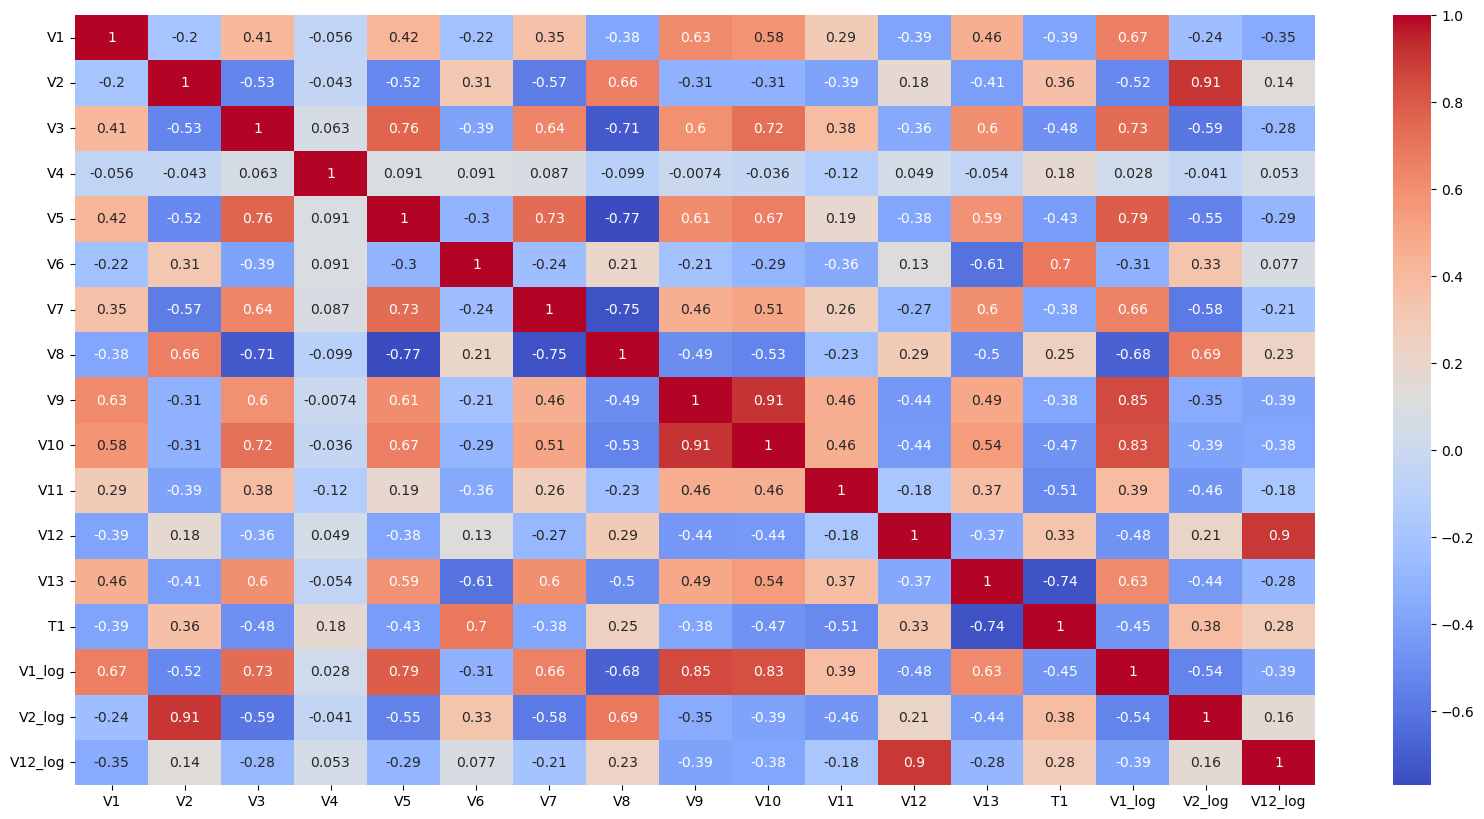

In [123]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

- V10 and V9 are highly correlated

# Base Model

- First let's build a base model with the original data without any feature engineering.

In [149]:
X = df.drop(columns=['T1', 'V1_log', 'V2_log', 'V12_log'], axis=1)
y = df['T1']

In [125]:
import xgboost as xgb
model = xgb.XGBRegressor()

In [126]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.01, 0.10, 0.20, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3 ],
 "colsample_bytree" : [ 0.3, 0.5 , 0.7 ]
    
}

In [127]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state = 42)

In [128]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost
grid_search=GridSearchCV(model,param_grid=params,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=cv,verbose=3)

In [52]:
grid_search.fit(X,y)

Fitting 15 folds for each of 768 candidates, totalling 11520 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=No...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_by

In [53]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [54]:
grid_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 0.3,
 'max_depth': 4,
 'min_child_weight': 1}

In [55]:
best_grid = grid_search.best_estimator_

In [59]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(best_grid,X,y,cv=cv)
print("r2 score of the best estimator for all folds is: ", score)

r2 score of the best estimator for all folds is:  [0.91525941 0.89702154 0.8477881  0.91916966 0.87197172 0.91524074
 0.88202624 0.85292506 0.9404619  0.88811516 0.88619482 0.93871506
 0.88078845 0.8306052  0.85094133]


In [60]:
score.mean()

0.8878149582763073

In [61]:
score.std()

0.03237741135367902

<AxesSubplot:title={'center':'Feature Importance'}>

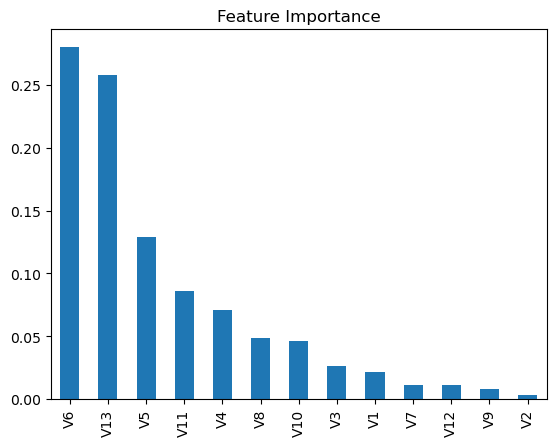

In [63]:
coef = pd.Series(best_grid.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

- V6 and V13 are the very important features and V2 is the least important one

In [73]:
# Now lets try to improve the model performance by tweaking with some features

In [65]:
# Now lets try to improve the model performance by tweaking with some features
# Previously we have seen that V10 and V9 are highly correlated. V9 is the least important of those 2 and hence let's remove V9
# and evaluate the performace
X = df.drop(columns=['T1','V9', 'V1_log', 'V2_log', 'V12_log'], axis=1)
y = df['T1']


In [74]:
score_no_v9 = cross_val_score(best_grid,X,y,cv=cv)

In [75]:
score_no_v9.mean(), score_no_v9.std()

(0.8703265276302239, 0.04444253469934128)

- r2 score decreased when V9 is dropped. So, its better to use it for the training instead of dropping it.

In [77]:
# Now let's try the log transformed columns instead of the original ones to train the model
X_log_trans = df.drop(columns=['T1', 'V1', 'V2', 'V12'], axis=1)
y = df['T1']


In [78]:
score_log_trans = cross_val_score(best_grid,X_log_trans,y,cv=cv)

In [79]:
score_log_trans.mean(), score_log_trans.std()

(0.8662919860665828, 0.03469798989069188)

- Score did not improve even after using log transformed features

In [134]:
# Now let's try and remove the possible outliers
df_new = df.drop(df[((df.V1 >= 5)|(df_new.V6 <= 6)|(df_new.V9 >= 20)|(df_new.V10 >= 600)) & (df.T1==50)].index)

In [135]:
df.shape, df_new.shape

((506, 17), (502, 17))

In [146]:
X_no_outliers = df_new.drop(columns=['T1', 'V1_log', 'V2_log', 'V12_log'], axis=1)
y_no_outliers = df_new['T1']


In [147]:
score_no_outliers = cross_val_score(best_grid,X_no_outliers,y,cv=cv)

In [148]:
score_log_trans.mean(), score_log_trans.std()

(0.8662919860665828, 0.03469798989069188)

- Score is still not improved. 

# Conclusions

- Base model trained with original data is performing better than the other models trained on modified data.
- mean r2 score for the base model is 0.8878149582763073 (higher r2 score(goodness of fit), better the model performance)
- Since it is a tree based model(XGBoostRegressor), normalisation is not performed. Tree based models doesn't require normalisation

# With RandomForestRegressor

In [144]:
from sklearn.ensemble import RandomForestRegressor

# Create the parameter grid for Random forest regressor
param_grid_rf = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid_rf, 
                          cv = cv, n_jobs = -1, verbose = 2)

In [150]:
grid_search_rf.fit(X, y)

Fitting 15 folds for each of 288 candidates, totalling 4320 fits


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [151]:
grid_search_rf.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [152]:
best_grid_rf = grid_search_rf.best_estimator_

In [154]:
score_rf=cross_val_score(best_grid_rf,X,y,cv=cv)

In [155]:
score_rf.mean(), score_rf.std()

(0.835630918329871, 0.044439508561740164)

# With Linear Model


In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

- Since it is a LInear model, min max scaler is applied to scale the features to same scale

In [167]:
df_scaled = pd.DataFrame(scaler.fit_transform(df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13']]))

In [168]:
df_scaled['T1'] = df[['T1']]

In [169]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,T1
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [170]:
df_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,T1
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409,22.532806
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040,17.025000
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728,21.200000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000


In [171]:
from sklearn.linear_model import Ridge
model_LR = Ridge()

In [174]:
X_LR = df_scaled.drop(columns=['T1'], axis=1)
y_LR = df_scaled['T1']

In [172]:
space = dict()
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']
space['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['fit_intercept'] = [True, False]
space['normalize'] = [True, False]

In [173]:
grid_search_LR = GridSearchCV(model_LR, space, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)

In [178]:
grid_search_LR.fit(X_LR, y_LR)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=42),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sag']},
             scoring='neg_mean_absolute_error')

In [181]:
grid_search_LR.best_params_

{'alpha': 0.1, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'}

In [182]:
best_grid_LR = grid_search_LR.best_estimator_

In [183]:
score_LR=cross_val_score(best_grid_LR,X_LR, y_LR,cv=cv)

In [184]:
score_LR

array([0.6605627 , 0.72508727, 0.69766916, 0.76926184, 0.69079751,
       0.77792109, 0.59319834, 0.79530312, 0.74089498, 0.6740943 ,
       0.59088466, 0.83088964, 0.66761819, 0.69324869, 0.65047259])

In [185]:
score_LR.mean(), score_LR.std()

(0.7038602724174229, 0.0674973243253759)

# Final Conclusions

- Of all the 3 models tried, mean r2 score for XGBoostRegressor is higher which implies that it is the best model suited for the given dataset
- To perform still better hyper parameter optimisation, we can try the following method:
    - Perform RandomsearchCV over a wider parameter space and narrow it down based on the results from randomsearchcv.
    - Then on the resulting feature space, we can perform a Grid search CV of all the combinations to find the best possible
    combination. This might possibly help for finer tuning of the parameters.
    